In [1]:
import os
import random
import time
import json
import warnings 
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import cv2

import numpy as np
import pandas as pd

import torchvision
import torchvision.transforms as transforms

from albumentations.pytorch import ToTensorV2

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt

plt.rcParams['axes.grid'] = False

print('pytorch version: {}'.format(torch.__version__))
print('GPU 사용 가능 여부: {}'.format(torch.cuda.is_available()))

print(torch.cuda.get_device_name(0))
print(torch.cuda.device_count())

device = "cuda" if torch.cuda.is_available() else "cpu"   # GPU 사용 가능 여부에 따라 device 정보 저장

pytorch version: 1.4.0
GPU 사용 가능 여부: True
NVIDIA GeForce RTX 2080 Ti
1


## 하이퍼파라미터 세팅 및 seed 고정

In [2]:
batch_size =16   # Mini-batch size
num_epochs = 20
learning_rate = 0.0001

In [3]:
# seed 고정
random_seed = 21
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
# torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

## 학습 데이터 EDA

### indoor data

In [7]:
df_temperature = pd.read_csv('temp_df_temperature_resolution_1hour_after_fillna.csv', index_col=['index'])

In [8]:
df_temperature.head()

,temperature(거실)
index,
2021-01-01 00:00:00,23.519
2021-01-01 01:00:00,23.667
2021-01-01 02:00:00,23.740
2021-01-01 03:00:00,23.900
2021-01-01 04:00:00,23.836


In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df_temperature['temperature(거실)'])
plt.grid()
plt.plot()

[]

### outdoor data

In [5]:
outdoor_temperature = np.array([23, 23, 23, 23, 24, 24, 
                                27, 28, 28, 31, 31, 32,
                                33, 33, 32, 32, 30, 30,
                                29, 27, 27, 26, 25, 24                    
                                ])

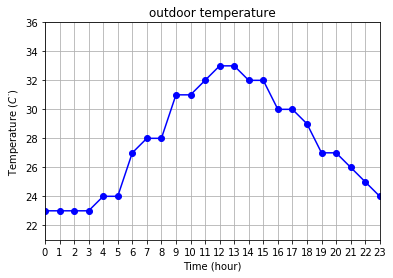

In [6]:
plt.plot(outdoor_temperature, 'b-o')

plt.xlim(0,23)
plt.ylim(21, 36)

plt.xticks(np.arange(24))

plt.title("outdoor temperature")
plt.xlabel("Time (hour)")
plt.ylabel("Temperature ($C^{\cdot}$)")

plt.grid(True)
plt.show()

## 데이터 전처리 함수 정의 (Dataset)

In [ ]:
class DataLoader(Dataset):
    def __init__(self, mode = 'train', transform=None):
        super().__init__()
        self.mode = mode
        self.transform = transform
        
    def __getitem__(self, index: int):
        # dataset이 index되어 list처럼 동작
        return
        
    def __len__(self) -> int:
        # 전체 dataset의 size를 return
        return len(self.coco.getImgIds())    